#Import Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn
import sklearn.model_selection as ms
import sklearn.metrics as met
import statsmodels.api as sm
import pydotplus as pp
import graphviz
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Import CSV

In [3]:
link_file = "https://media.githubusercontent.com/media/feverlash/PMM-Project/refs/heads/main/Dataset/Dataset.csv" #Yofan

df = pd.read_csv(link_file)

#EDA Dataset

In [4]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,total_acc,total_pymnt,total_rec_prncp,recoveries,last_pymnt_amnt,loan_status_class
count,373028.000000,3.730280e+05,3.730280e+05,373028.000000,373028.000000,373028.000000,373028.000000,3.730240e+05,373028.000000,373003.000000,373028.000000,373028.000000,373028.000000,373028.000000,373028.000000
mean,186513.500000,1.308019e+07,1.459837e+07,14317.583667,14292.268945,13.833770,431.986953,7.334189e+04,17.222219,25.069463,11540.311620,8863.673804,86.233437,3124.798466,0.890695
std,107684.052445,1.089400e+07,1.168287e+07,8291.196247,8279.296230,4.354663,243.518563,5.613241e+04,7.850161,11.591832,8272.661827,7036.196421,557.007436,5559.815170,0.312023
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,5.420000,15.670000,1.896000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93256.750000,3.640449e+06,4.379994e+06,8000.000000,8000.000000,10.990000,256.670000,4.500000e+04,11.370000,17.000000,5550.586971,3705.630000,0.000000,312.387500,1.000000
50%,186513.500000,1.010738e+07,1.194096e+07,12000.000000,12000.000000,13.660000,379.760000,6.300000e+04,16.870000,23.000000,9419.576549,6803.485000,0.000000,545.960000,1.000000
75%,279770.250000,2.073158e+07,2.300207e+07,20000.000000,20000.000000,16.490000,566.440000,8.900000e+04,22.790000,32.000000,15306.968130,12000.000000,0.000000,3179.735000,1.000000
max,373027.000000,3.785444e+07,4.061720e+07,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,156.000000,57777.579870,35000.030000,33520.270000,36170.140000,1.000000


In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,zip_code,addr_state,dti,total_acc,total_pymnt,total_rec_prncp,recoveries,last_pymnt_amnt,application_type,loan_status_class
0,0,10588532,12470492,15000,15000,36 months,8.90,476.30,A,A5,...,541xx,WI,17.01,32.0,16561.02,15000.00,0.0,8940.22,INDIVIDUAL,1
1,1,11215587,13127755,8000,8000,60 months,18.25,204.24,D,D3,...,370xx,TN,23.46,25.0,4697.52,2253.46,0.0,204.24,INDIVIDUAL,1
2,2,14218271,16270650,12150,12150,60 months,18.92,314.65,D,D4,...,376xx,TN,31.07,22.0,6293.00,2867.76,0.0,314.65,INDIVIDUAL,1
3,3,6504869,8057011,10000,10000,36 months,6.03,304.36,A,A1,...,376xx,TN,9.16,17.0,10858.01,10000.00,0.0,3553.37,INDIVIDUAL,1
4,4,3929378,5022980,15825,15825,36 months,12.12,526.53,B,B3,...,986xx,WA,17.94,31.0,4736.52,3435.17,0.0,526.53,INDIVIDUAL,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           373028 non-null  int64  
 1   id                   373028 non-null  int64  
 2   member_id            373028 non-null  int64  
 3   loan_amnt            373028 non-null  int64  
 4   funded_amnt          373028 non-null  int64  
 5   term                 373028 non-null  object 
 6   int_rate             373028 non-null  float64
 7   installment          373028 non-null  float64
 8   grade                373028 non-null  object 
 9   sub_grade            373028 non-null  object 
 10  emp_title            350981 non-null  object 
 11  emp_length           356235 non-null  object 
 12  home_ownership       373028 non-null  object 
 13  annual_inc           373024 non-null  float64
 14  verification_status  373028 non-null  object 
 15  purpose          

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


##Deskripsi Fitur

In [8]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,188739
RENT,150776
OWN,33313
OTHER,159
NONE,41


In [9]:
df['loan_status_class'].value_counts()

,count
loan_status_class,
1,332254
0,40774


In [10]:
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,219196
credit_card,83329
home_improvement,21253
other,19006
major_purchase,7873
small_business,5605
car,4246
medical,3750
moving,2397


In [11]:
df['annual_inc'].value_counts()

,count
annual_inc,
60000.0,14421
50000.0,12694
65000.0,10671
40000.0,10264
70000.0,9912
...,...
47088.0,1
36775.0,1
62908.0,1


#Manipulasi Data

## Encode Data Bertipe Non-Numerik

In [12]:
encoder = LabelEncoder()

### Term

In [13]:
df['term'].value_counts()

,count
term,
36 months,270199
60 months,102829


In [14]:
encoder.fit(df['term'])
df['term'] = encoder.transform(df['term'])

In [15]:
df['term'].value_counts()

,count
term,
0,270199
1,102829


###Grade

In [16]:
df['grade'].value_counts()

,count
grade,
B,109344
C,100342
D,61713
A,59810
E,28590
F,10606
G,2623


In [17]:
#encoder.fit(df['grade'])
#df['grade'] = encoder.transform(df['grade'])
#df['grade'].value_counts()

#One Hot Encoding
df = pd.get_dummies(df, columns=['grade'])

#df['grade'] = df['grade'].replace(['G','F','E','D','C','B','A'],[0,1,2,3,4,5,6])

###Verification Status

In [18]:
df['verification_status'].value_counts()

,count
verification_status,
Verified,134571
Source Verified,119969
Not Verified,118488


In [19]:
encoder.fit(df['verification_status'])
df['verification_status'] = encoder.transform(df['verification_status'])
df['verification_status'].value_counts()
#df = pd.get_dummies(df, columns=['verification_status'])

,count
verification_status,
2,134571
1,119969
0,118488


###Purpose

In [20]:
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,219196
credit_card,83329
home_improvement,21253
other,19006
major_purchase,7873
small_business,5605
car,4246
medical,3750
moving,2397


In [21]:
#df['purpose'] = df['purpose'].replace(['vacation','educational','moving','car','medical','other','renewable_energy','major_purchase','wedding','home_improvement','credit_card','house','debt_consolidation','small_business'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

df['purpose'] = df['purpose'].replace(['other','debt_consolidation','medical','educational','small_business','moving','home_improvement','credit_card','wedding','car','renewable_energy','major_purchase','house','vacation'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
df['purpose'].value_counts()

<ipython-input-21-d769a9b81e18>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['purpose'] = df['purpose'].replace(['other','debt_consolidation','medical','educational','small_business','moving','home_improvement','credit_card','wedding','car','renewable_energy','major_purchase','house','vacation'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13])


,count
purpose,
1,219196
7,83329
6,21253
0,19006
11,7873
4,5605
9,4246
2,3750
5,2397


###Home Ownership

In [22]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,188739
RENT,150776
OWN,33313
OTHER,159
NONE,41


In [23]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','OTHER','RENT','MORTGAGE','OWN'],[0,1,2,3,4])
df['home_ownership'].value_counts()

<ipython-input-23-279d191500ce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['home_ownership'] = df['home_ownership'].replace(['NONE','OTHER','RENT','MORTGAGE','OWN'],[0,1,2,3,4])


,count
home_ownership,
3,188739
2,150776
4,33313
1,159
0,41


### Employees Length

In [24]:
dict_map_empl = {'10+ years':10,'9 years':9,'8 years':8,'7 years':7,'6 years':6,'5 years':5,'4 years':4,'3 years':3,'2 years':2,'1 year':1,'< 1 year':0}
df["emp_length"] = df["emp_length"].map(dict_map_empl)

In [25]:
df["emp_length"].value_counts

<bound method IndexOpsMixin.value_counts of 0          7.0
1         10.0
2          3.0
3          3.0
4         10.0
          ... 
373023    10.0
373024     7.0
373025     NaN
373026     4.0
373027     7.0
Name: emp_length, Length: 373028, dtype: float64>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           373028 non-null  int64  
 1   id                   373028 non-null  int64  
 2   member_id            373028 non-null  int64  
 3   loan_amnt            373028 non-null  int64  
 4   funded_amnt          373028 non-null  int64  
 5   term                 373028 non-null  int64  
 6   int_rate             373028 non-null  float64
 7   installment          373028 non-null  float64
 8   sub_grade            373028 non-null  object 
 9   emp_title            350981 non-null  object 
 10  emp_length           356235 non-null  float64
 11  home_ownership       373028 non-null  int64  
 12  annual_inc           373024 non-null  float64
 13  verification_status  373028 non-null  int64  
 14  purpose              373028 non-null  int64  
 15  title            

## Pengisian Example Kosong

In [27]:
df1 = df.copy()

###Annual Income

In [28]:
#Pengisian Example yang kosong menggunakan modus

modus_inc = df1['annual_inc'].mode()[0]
df1['annual_inc'] = df1['annual_inc'].fillna(modus_inc)
df1['annual_inc'].isna().sum()

0

###Total Accepted

In [29]:
df1['total_acc'].value_counts()

,count
total_acc,
21.0,13692
20.0,13628
22.0,13591
23.0,13418
19.0,13411
...,...
121.0,1
102.0,1
156.0,1


In [30]:
#Pengisian Example yang kosong menggunakan asumsi jumlah transaksi pinjaman 0

df1['total_acc'] = df1['total_acc'].fillna(0)
df1['total_acc'].isna().sum()

0

###Employees Length

In [31]:
#Pengisian Example yang kosong menggunakan modus

modus_emp = df1['emp_length'].mode()[0]
df1['emp_length'] = df1['emp_length'].fillna(modus_emp)
df1['emp_length'].isna().sum()

0

In [32]:
df1['emp_length'].value_counts()

,count
emp_length,
10.0,136793
2.0,33123
3.0,29301
0.0,28971
5.0,24654
1.0,23582
4.0,22482
6.0,21057
7.0,20834


In [33]:
df1.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
term,0
int_rate,0
installment,0
sub_grade,0
emp_title,22047


##Checkpoint

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           373028 non-null  int64  
 1   id                   373028 non-null  int64  
 2   member_id            373028 non-null  int64  
 3   loan_amnt            373028 non-null  int64  
 4   funded_amnt          373028 non-null  int64  
 5   term                 373028 non-null  int64  
 6   int_rate             373028 non-null  float64
 7   installment          373028 non-null  float64
 8   sub_grade            373028 non-null  object 
 9   emp_title            350981 non-null  object 
 10  emp_length           373028 non-null  float64
 11  home_ownership       373028 non-null  int64  
 12  annual_inc           373028 non-null  float64
 13  verification_status  373028 non-null  int64  
 14  purpose              373028 non-null  int64  
 15  title            

#Seleksi Fitur

##Drop Fitur Berdasarkan Common Sense

In [35]:
df2 = df1.copy()

#Drop Fitur Berdasarkan Common Sense
df2.drop(['Unnamed: 0','id', 'member_id','emp_title', 'sub_grade','title','zip_code','addr_state','application_type'], axis=1, inplace=True)

##Korelasi

<Axes: >

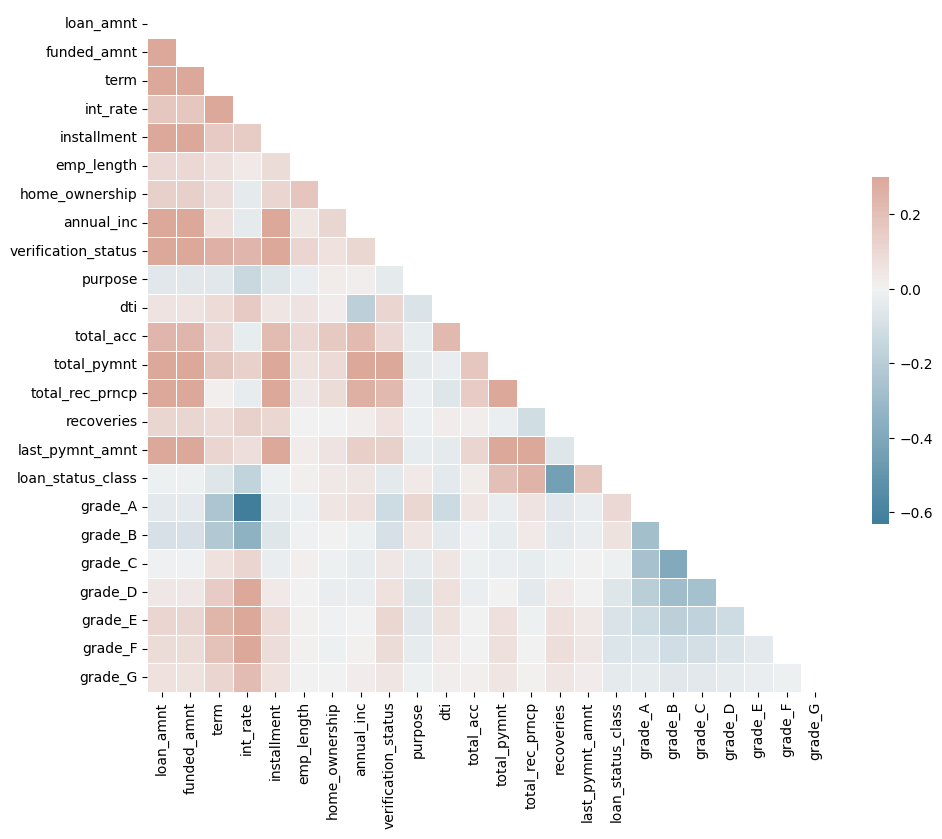

In [36]:
corr = df2.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
corr

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,...,recoveries,last_pymnt_amnt,loan_status_class,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
loan_amnt,1.000000,0.998552,0.413546,0.166809,0.949676,0.098557,0.135575,0.364168,0.364158,-0.059153,...,0.110606,0.304977,-0.012414,-0.047952,-0.093467,-0.008204,0.039714,0.111479,0.084524,0.063630
funded_amnt,0.998552,1.000000,0.411541,0.167528,0.951788,0.099101,0.135654,0.363599,0.363445,-0.059294,...,0.110296,0.304949,-0.011587,-0.048269,-0.093483,-0.007514,0.040228,0.110699,0.083696,0.063288
term,0.413546,0.411541,1.000000,0.443676,0.160356,0.067188,0.080561,0.068676,0.261437,-0.058838,...,0.090823,0.111586,-0.065165,-0.243970,-0.221441,0.064178,0.152078,0.243871,0.187278,0.111855
int_rate,0.166809,0.167528,0.443676,1.000000,0.148166,0.031741,-0.041330,-0.045007,0.236284,-0.138204,...,0.128385,0.075368,-0.172665,-0.631452,-0.344435,0.111480,0.378994,0.440088,0.381371,0.212515
installment,0.949676,0.951788,0.160356,0.148166,1.000000,0.085776,0.112867,0.361456,0.332865,-0.060767,...,0.105453,0.300785,-0.014173,-0.036011,-0.068131,-0.023897,0.030234,0.092421,0.081325,0.065646
emp_length,0.098557,0.099101,0.067188,0.031741,0.085776,1.000000,0.176506,0.049019,0.117922,-0.024786,...,0.004922,0.026744,0.011091,-0.019910,-0.005857,0.011124,0.004386,0.008801,0.005817,0.001202
home_ownership,0.135575,0.135654,0.080561,-0.041330,0.112867,0.176506,1.000000,0.107909,0.064315,0.025940,...,0.001475,0.059124,0.034576,0.046439,0.002251,-0.012097,-0.024241,-0.008236,-0.010037,0.001991
annual_inc,0.364168,0.363599,0.068676,-0.045007,0.361456,0.049019,0.107909,1.000000,0.106342,0.017406,...,0.016305,0.140051,0.047995,0.073569,-0.011409,-0.032345,-0.027671,0.000298,0.006285,0.020353
verification_status,0.364158,0.363445,0.261437,0.236284,0.332865,0.117922,0.064315,0.106342,1.000000,-0.043669,...,0.066616,0.127822,-0.046128,-0.124337,-0.094909,0.039431,0.065428,0.105883,0.088650,0.049377
purpose,-0.059153,-0.059294,-0.058838,-0.138204,-0.060767,-0.024786,0.025940,0.017406,-0.043669,1.000000,...,-0.018185,-0.032111,0.031806,0.105965,0.046227,-0.034744,-0.060593,-0.055234,-0.036696,-0.014465


Korelasi

loan_amnt - **funded_amnt**

int_rate - **grade**

installment - **funded_amnt** - loan_amnt

**total_pymnt**	- total_rec_prncp

## Drop Fitur Berdasarkan Korelasi

In [38]:
df2.drop(['loan_amnt'], axis=1, inplace=True)

##OLS Regression

In [39]:
df3 = df2.copy()

In [40]:
df_target = df['loan_status_class']
df3.drop(['loan_status_class'],axis=1, inplace=True)

In [41]:
ss = StandardScaler()
cols = df3.columns
df3[cols] = ss.fit_transform(df3[cols])

In [42]:
df3_sm = sm.add_constant(df3)
sm_model = sm.OLS(df_target,df3_sm.astype(int)).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:      loan_status_class   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     5104.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:02:03   Log-Likelihood:                -47734.
No. Observations:              373028   AIC:                         9.551e+04
Df Residuals:                  373006   BIC:                         9.575e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6481    

##Drop Fitur Berdasarkan Uji OLS Regression

In [43]:
df3.drop(['dti'],axis=1, inplace=True)

In [44]:
df3_sm = sm.add_constant(df3)
sm_model = sm.OLS(df_target,df3_sm.astype(int)).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:      loan_status_class   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     5359.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:02:04   Log-Likelihood:                -47734.
No. Observations:              373028   AIC:                         9.551e+04
Df Residuals:                  373007   BIC:                         9.574e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6481    

##Checkpoint

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_amnt          373028 non-null  float64
 1   term                 373028 non-null  float64
 2   int_rate             373028 non-null  float64
 3   installment          373028 non-null  float64
 4   emp_length           373028 non-null  float64
 5   home_ownership       373028 non-null  float64
 6   annual_inc           373028 non-null  float64
 7   verification_status  373028 non-null  float64
 8   purpose              373028 non-null  float64
 9   total_acc            373028 non-null  float64
 10  total_pymnt          373028 non-null  float64
 11  total_rec_prncp      373028 non-null  float64
 12  recoveries           373028 non-null  float64
 13  last_pymnt_amnt      373028 non-null  float64
 14  grade_A              373028 non-null  float64
 15  grade_B          

In [46]:
df_target

,loan_status_class
0,1
1,1
2,1
3,1
4,0
...,...
373023,1
373024,1
373025,1
373026,1


#Modelling

##Split Data

In [47]:
y = df_target.copy()
X = df3.copy()

In [48]:
y.value_counts()

,count
loan_status_class,
1,332254
0,40774


In [49]:
X_train,X_test,y_train,y_test = ms.train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
print(X_train)
print(y_train)

        funded_amnt      term  int_rate  installment  emp_length  \
33656     -0.156085 -0.616902 -1.410850    -0.108686   -1.147159   
12045     -0.231574 -0.616902 -0.166206    -0.058997    1.051257   
294874     0.456891 -0.616902  0.407892     0.821306    1.051257   
234958    -0.518435 -0.616902  0.033580    -0.370843    1.051257   
27835     -0.648277 -0.616902  0.265516    -0.503605    1.051257   
...             ...       ...       ...          ...         ...   
259178     1.293316  1.621004 -1.250103     0.326887    1.051257   
365838    -0.276868 -0.616902 -1.656564    -0.260913    1.051257   
131932     0.689399 -0.616902 -0.618595     0.920354    1.051257   
146867     0.327049 -0.616902 -1.792052     0.350787    1.051257   
121958     0.689399  1.621004 -0.069757     0.117129    1.051257   

        home_ownership  annual_inc  verification_status   purpose  total_acc  \
33656        -1.086432   -0.504912            -1.268200 -0.677506  -0.264618   
12045        -1.086432 

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_amnt          373028 non-null  float64
 1   term                 373028 non-null  float64
 2   int_rate             373028 non-null  float64
 3   installment          373028 non-null  float64
 4   emp_length           373028 non-null  float64
 5   home_ownership       373028 non-null  float64
 6   annual_inc           373028 non-null  float64
 7   verification_status  373028 non-null  float64
 8   purpose              373028 non-null  float64
 9   total_acc            373028 non-null  float64
 10  total_pymnt          373028 non-null  float64
 11  total_rec_prncp      373028 non-null  float64
 12  recoveries           373028 non-null  float64
 13  last_pymnt_amnt      373028 non-null  float64
 14  grade_A              373028 non-null  float64
 15  grade_B          

##Training Data

### Logistic Regression

In [52]:
model = lm.LogisticRegression(max_iter=100000000) #MLE
model.fit(X_train,y_train)

LogisticRegression(max_iter=100000000)

In [53]:
print(model.intercept_)
print(model.coef_)

[-0.26035244]
[[ 1.30859159e+00 -1.58651887e-01 -1.47256735e+00 -2.97555709e+00
   2.59982136e-02  6.72327193e-02  2.16191464e-01 -1.11314373e-01
   2.63756177e-02 -4.70050165e-02  2.03277517e+00  1.64128234e+00
  -3.61045650e+01  2.63986139e+00 -5.90050385e-01 -4.01304626e-01
  -2.13278348e-03  3.61524363e-01  5.51128763e-01  5.51732353e-01
   3.28753580e-01]]


In [54]:
y_prediksi=model.predict(X_test)
print(y_prediksi)

[1 1 1 ... 1 1 1]


In [55]:
y_test

,loan_status_class
171763,1
85740,1
100676,1
213659,1
35195,1
...,...
227580,1
195066,1
269840,1
167897,1


In [56]:
confmatrix_log = met.confusion_matrix(y_test,y_prediksi)
confmatrix_log

array([[ 4278,  3795],
       [  124, 66409]])

In [57]:
tn, fp, fn, tp = confmatrix_log.ravel()

print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

True Negative: 4278
False Positive: 3795
False Negative: 124
True Positive: 66409


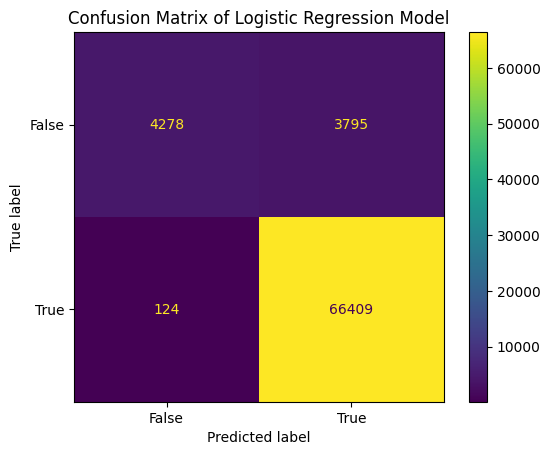

In [58]:
cm_display_log = met.ConfusionMatrixDisplay(confusion_matrix = confmatrix_log, display_labels = [False, True])

cm_display_log.plot()
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

In [59]:
print(met.classification_report(y_test,y_prediksi))

              precision    recall  f1-score   support

           0       0.97      0.53      0.69      8073
           1       0.95      1.00      0.97     66533

    accuracy                           0.95     74606
   macro avg       0.96      0.76      0.83     74606
weighted avg       0.95      0.95      0.94     74606



In [60]:
import sklearn.feature_selection as fs
rfe = fs.RFE(model)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True False False False False False False  True  True
  True  True False  True False False  True  True False]
[ 1  6  1  1 11  8  5  7 10  9  1  1  1  1  3  1 12  2  1  1  4]


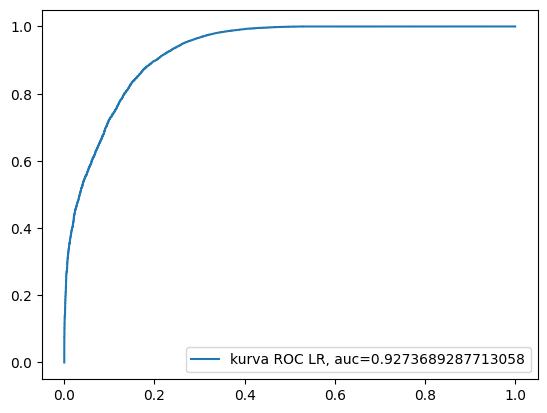

In [61]:
y_pred_proba_log = model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba_log)
auc = met.roc_auc_score(y_test,y_pred_proba_log)
plt.plot(fp,tp,label='kurva ROC LR, auc='+str(auc))
plt.legend()
plt.show()

In [62]:
print('Accuracy :',met.accuracy_score(y_test,y_prediksi))
print('Precision :',met.precision_score(y_test,y_prediksi))
print('Sensitivity :',met.recall_score(y_test,y_prediksi))
#print('AUC Score :',met.roc_auc_score(y_test,y_prediksi))

Accuracy : 0.947470712811302
Precision : 0.9459432510968036
Sensitivity : 0.9981362632077315


In [63]:
print('Jumlah error tipe 1 adalah',confmatrix_log[0][1] )
print('Jumlah error tipe 2 adalah',confmatrix_log[1][0] )
print('Error rate :', 1-met.accuracy_score(y_test,y_prediksi))

Jumlah error tipe 1 adalah 3795
Jumlah error tipe 2 adalah 124
Error rate : 0.05252928718869798


###Linear Discriminant Analysis (LDA)

In [64]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train,y_train)

In [65]:
print("b_0 =", model_lda.intercept_)
print("b =", model_lda.coef_)

b_0 = [3.6618908]
b = [[ 0.46865724 -0.23409668 -0.98189046 -1.75034822  0.06454607  0.08439814
   0.11677425 -0.13661356  0.03486404  0.04492174  2.59506227 -0.64956332
  -1.74905769 -0.06147845 -0.25959698 -0.13071258  0.04662823  0.14895641
   0.17455557  0.14799506  0.08747647]]


In [66]:
y_pred_LDA = model_lda.predict(X_test)
print(y_pred_LDA)

[1 1 1 ... 1 1 1]


In [67]:
confmatrix_LDA = met.confusion_matrix(y_test,y_pred_LDA)
confmatrix_LDA

array([[ 2439,  5634],
       [   21, 66512]])

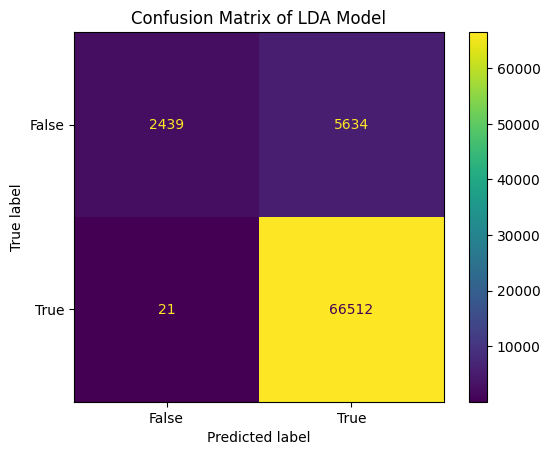

In [68]:
cm_display_lda = met.ConfusionMatrixDisplay(confusion_matrix = confmatrix_LDA, display_labels = [False, True])

cm_display_lda.plot()
plt.title('Confusion Matrix of LDA Model')
plt.show()

In [69]:
print(met.classification_report(y_test,y_pred_LDA))

              precision    recall  f1-score   support

           0       0.99      0.30      0.46      8073
           1       0.92      1.00      0.96     66533

    accuracy                           0.92     74606
   macro avg       0.96      0.65      0.71     74606
weighted avg       0.93      0.92      0.91     74606



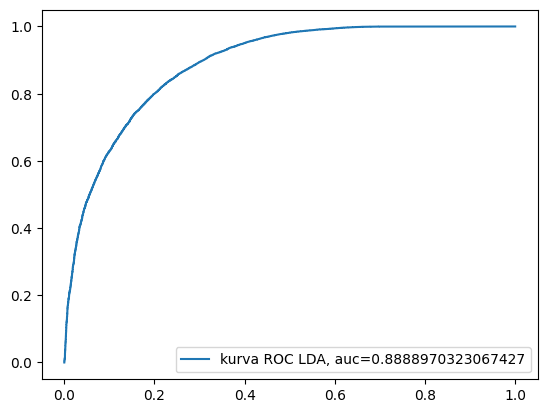

In [70]:
y_pred_proba_lda = model_lda.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba_lda)
auc_lda = met.roc_auc_score(y_test,y_pred_proba_lda)
plt.plot(fp,tp,label='kurva ROC LDA, auc='+str(auc_lda))
plt.legend()
plt.show()

In [71]:
print('Accuracy :',met.accuracy_score(y_test,y_pred_LDA))
print('Precision :',met.precision_score(y_test,y_pred_LDA))
print('Sensitivity :',met.recall_score(y_test,y_pred_LDA))
#print(met.roc_auc_score(y_test,y_pred_LDA))

Accuracy : 0.9242018068251884
Precision : 0.9219083525074155
Sensitivity : 0.9996843671561481


In [72]:
print('Jumlah error tipe 1 adalah',confmatrix_LDA[0][1] )
print('Jumlah error tipe 2 adalah',confmatrix_LDA[1][0] )
print('Error rate :', 1-met.accuracy_score(y_test,y_pred_LDA))

Jumlah error tipe 1 adalah 5634
Jumlah error tipe 2 adalah 21
Error rate : 0.07579819317481162


###Decision Tree

In [73]:
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [74]:
dt_pred = dt_model.predict(X_test)

In [75]:
confmatrix_dt = met.confusion_matrix(y_test,dt_pred)
print(confmatrix_dt)

[[ 5494  2579]
 [  148 66385]]


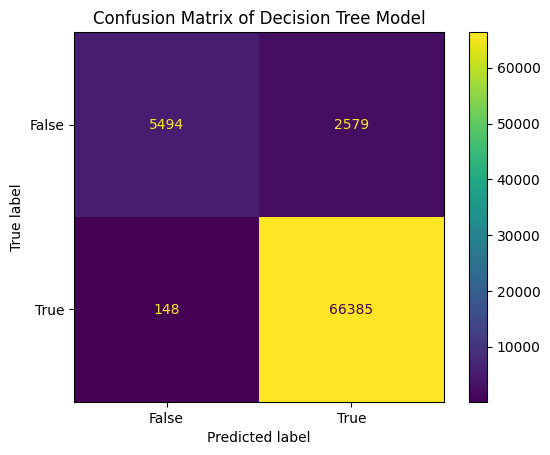

In [76]:
cm_display_dt = met.ConfusionMatrixDisplay(confusion_matrix = confmatrix_dt, display_labels = [False, True])

cm_display_dt.plot()
plt.title('Confusion Matrix of Decision Tree Model')
plt.show()

In [77]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80      8073
           1       0.96      1.00      0.98     66533

    accuracy                           0.96     74606
   macro avg       0.97      0.84      0.89     74606
weighted avg       0.96      0.96      0.96     74606



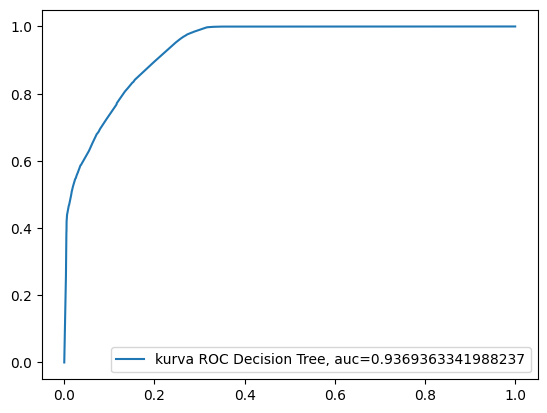

In [78]:
y_pred_proba_dt = dt_model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba_dt)
auc_dt = met.roc_auc_score(y_test,y_pred_proba_dt)
plt.plot(fp,tp,label='kurva ROC Decision Tree, auc='+str(auc_dt))
plt.legend()
plt.show()

In [79]:
print('Accuracy :',met.accuracy_score(y_test,dt_pred))
print('Precision :',met.precision_score(y_test,dt_pred))
print('Sensitivity :',met.recall_score(y_test,dt_pred))
#print(met.roc_auc_score(y_test,y_pred_LDA))

Accuracy : 0.9634479800552235
Precision : 0.9626036772809001
Sensitivity : 0.997775539957615


In [80]:
print('Jumlah error tipe 1 adalah',confmatrix_dt[0][1] )
print('Jumlah error tipe 2 adalah',confmatrix_dt[1][0] )
print('Error rate :', 1-met.accuracy_score(y_test,dt_pred))

Jumlah error tipe 1 adalah 2579
Jumlah error tipe 2 adalah 148
Error rate : 0.036552019944776526


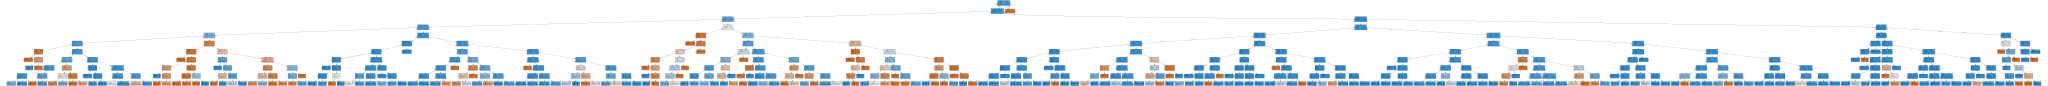

In [81]:
iris = datasets.load_iris()

dot_data = sklearn.tree.export_graphviz(dt_model, out_file=None,
                                filled=True )
#graph = pp.graph_from_dot_data(dot_data)
graph = graphviz.Source(dot_data, format="png")
graph
#graph.write_png('decisiontree.png')

###Random Forest

In [82]:
rf= RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [83]:
rf_pre=rf.predict(X_test)

In [84]:
confmatrix_rf = confusion_matrix(y_test,rf_pre)
print(confmatrix_rf)

[[ 5905  2168]
 [  102 66431]]


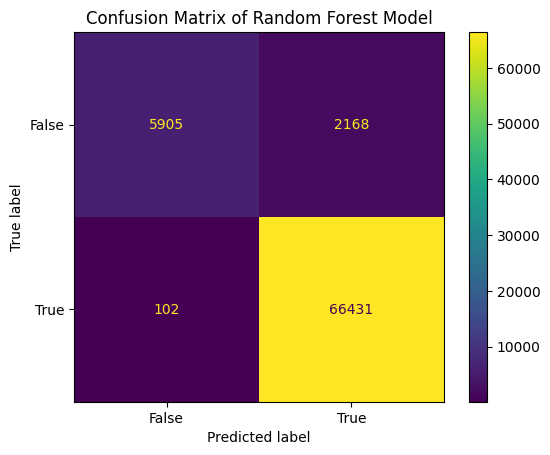

In [85]:
cm_display_rf = met.ConfusionMatrixDisplay(confusion_matrix = confmatrix_rf, display_labels = [False, True])

cm_display_rf.plot()
plt.title('Confusion Matrix of Random Forest Model')
plt.show()

In [86]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      8073
           1       0.97      1.00      0.98     66533

    accuracy                           0.97     74606
   macro avg       0.98      0.86      0.91     74606
weighted avg       0.97      0.97      0.97     74606



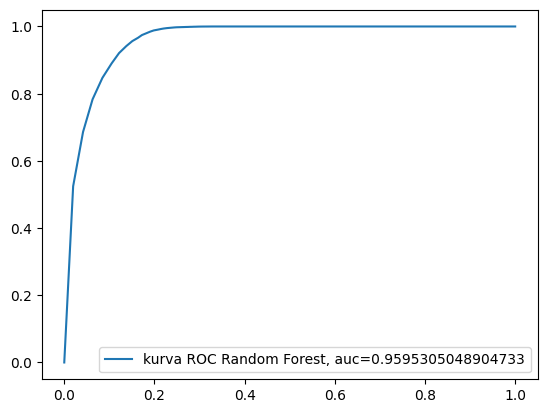

In [87]:
y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba_rf)
auc_rf = met.roc_auc_score(y_test,y_pred_proba_rf)
plt.plot(fp,tp,label='kurva ROC Random Forest, auc='+str(auc_rf))
plt.legend()
plt.show()

In [88]:
print('Accuracy :',met.accuracy_score(y_test,rf_pre))
print('Precision :',met.precision_score(y_test,rf_pre))
print('Sensitivity :',met.recall_score(y_test,rf_pre))
#print(met.roc_auc_score(y_test,y_pred_LDA))

Accuracy : 0.9695734927485725
Precision : 0.9683960407586116
Sensitivity : 0.9984669261870049


In [89]:
print('Jumlah error tipe 1 adalah',confmatrix_rf[0][1] )
print('Jumlah error tipe 2 adalah',confmatrix_rf[1][0] )
print('Error rate :', 1-met.accuracy_score(y_test,rf_pre))

Jumlah error tipe 1 adalah 2168
Jumlah error tipe 2 adalah 102
Error rate : 0.03042650725142748


In [90]:
print(rf.feature_importances_)

[0.06556621 0.00912057 0.04421292 0.09547399 0.0158799  0.00753114
 0.03258704 0.00782849 0.01023592 0.02824523 0.09280454 0.15862003
 0.33355889 0.08324824 0.00239608 0.00193922 0.00388224 0.00304529
 0.00200513 0.00136192 0.00045704]
